# Condiciones de la asignación principal
Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

## Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.


## Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.



# Cargar los datos

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#contract=pd.read_csv('/datasets/final_provider/contract.csv')
#contract=pd.read_csv('contract.csv')
#personal=pd.read_csv('/datasets/final_provider/personal.csv')
#personal=pd.read_csv('personal.csv')
#internet=pd.read_csv('/datasets/final_provider/internet.csv')
#internet=pd.read_csv('internet.csv')
#phone=pd.read_csv('/datasets/final_provider/phone.csv')
#phone=pd.read_csv('phone.csv')

In [3]:
contract=pd.read_csv('datasets/final_provider/contract.csv')
personal=pd.read_csv('datasets/final_provider/personal.csv')
internet=pd.read_csv('datasets/final_provider/internet.csv')
phone=pd.read_csv('datasets/final_provider/phone.csv')

# EDA

## Datos ausentes y tipos de datos

### contract

In [4]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [5]:
contract.sample()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
129,2639-UGMAZ,2014-03-01,No,One year,Yes,Electronic check,56.45,3985.35


In [6]:
contract.duplicated().sum()

0

array([[<Axes: title={'center': 'MonthlyCharges'}>]], dtype=object)

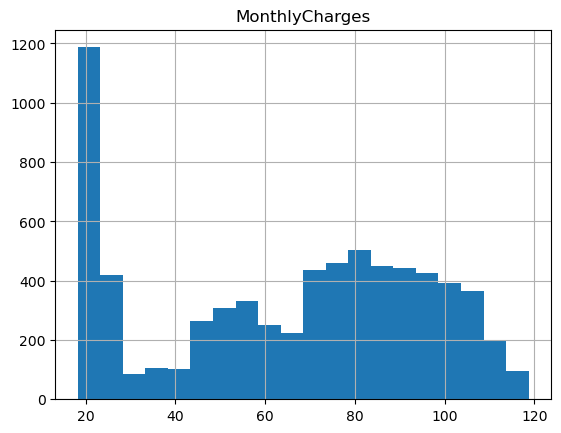

In [7]:
contract.hist(bins=20)

<Axes: >

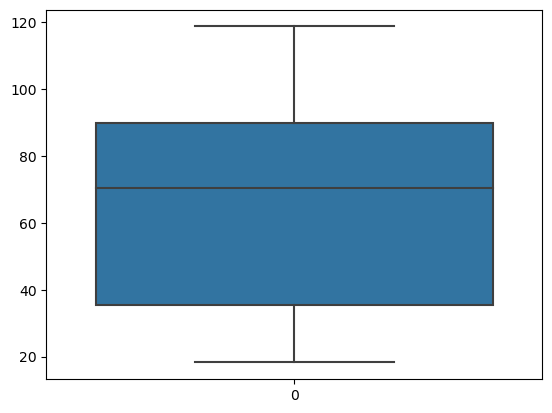

In [8]:
sns.boxplot(contract['MonthlyCharges'])

### personal

In [9]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [10]:
personal.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents
3897,8015-IHCGW,Female,0,Yes,Yes


In [11]:
personal.duplicated().sum()

0

In [12]:
personal['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

array([[<Axes: title={'center': 'SeniorCitizen'}>]], dtype=object)

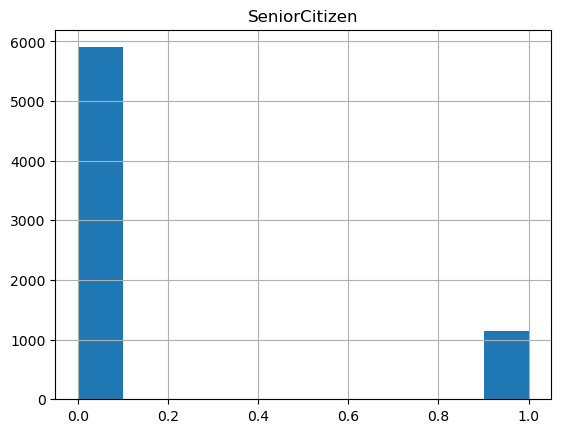

In [13]:
personal.hist()

### internet

In [14]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [15]:
internet.sample()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
96,3071-VBYPO,Fiber optic,Yes,Yes,No,No,Yes,No


In [16]:
internet.duplicated().sum()

0

### phone

In [17]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [18]:
phone.sample()

,customerID,MultipleLines
1469,3092-IGHWF,Yes


In [19]:
phone.duplicated().sum()

0

# Preprocesamiento

## Nombres de columnas

In [20]:
contract.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [21]:
contract=contract.rename(columns={'customerID':'customer_id','BeginDate':'begin_date','EndDate':'end_date','Type':'type',
                                  'PaymentMethod':'payment_method','MonthlyCharges':'monthly_charges','TotalCharges':'total_charges'})
contract.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'PaperlessBilling',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

In [22]:
personal.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

In [23]:
personal=personal.rename(columns={'customerID':'customer_id','SeniorCitizen':'senior_citizen','Partner':'partner','Dependents':'dependents'})
personal.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

In [24]:
internet.columns

Index(['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [25]:
internet=internet.rename(columns={'customerID':'customer_id','InternetService':'internet_service','OnlineSecurity':'online_security',
                                  'OnlineBackup':'online_backup','DeviceProtection':'device_protection','TeachSupport':'teach_support',
                                  'StreamingTV':'streaming_tv','StreamingMovies':'streaming_movies'})
internet.columns

Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'TechSupport', 'streaming_tv', 'streaming_movies'],
      dtype='object')

In [26]:
phone.columns

Index(['customerID', 'MultipleLines'], dtype='object')

In [27]:
phone=phone.rename(columns={'customerID':'customer_id','MulyipleLines':'multiple_lines'})
phone.columns

Index(['customer_id', 'MultipleLines'], dtype='object')

## Datos ausentes
Es muy probable que algunos clientes no tienen alguno de los dos servicios: internet o teléfono. Necesito saber si alguno no tiene ninguno de estos dos servicios.

In [30]:
p_id=personal.customer_id
c_id=contract.customer_id
i_id=internet.customer_id
ph_id=phone.customer_id

In [35]:
# ¿todos los clientes registrados en la tabla 'personal' estan en la tabla 'contract'?
all([True if item in contract.customer_id.values else False for item in p_id.values])

True

In [36]:
# ¿todos los clientes registrados en la tabla 'personal' estan en la tabla 'internet'?
all([True if item in internet.customer_id.values else False for item in p_id.values])

False

In [37]:
# ¿todos los clientes registrados en la tabla 'personal' estan en la tabla 'phone'?
all([True if item in phone.customer_id.values else False for item in p_id.values])

False

In [38]:
personal.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

In [40]:
# ¿quienes son los clientes que no tienen internet?
# personal[personal.customer_id.isin()]

not_internet=personal[~personal.customer_id.isin(i_id)]['customer_id']

# handhelds = ['3DS', 'DS', 'GB', 'GBA', 'PSP']
# print(df[~df['platform'].isin(handhelds)][['name', 'platform']])
len(not_internet)

1526

In [41]:
# ¿quienes son los clientes que no tienen teléfono?
not_phone=personal[~personal.customer_id.isin(ph_id)]['customer_id']
len(not_phone)

682

In [44]:
# ¿los clientes sin internet tampoco tienen teléfono?
any([True if item in not_internet.values else False for item in not_phone.values])

False

In [45]:
# ¿los clientes sin teléfono tampoco tienen internet?
any([True if item in not_phone.values else False for item in not_internet.values])

False

# Lista de preguntas aclaratorias
1 Este fue mi análisis exploratorio, busqué datos duplicados, ausentes y revisé distribuciones y tipos de datos. ¿hace falta algo mas?

2 ¿qué significa la columna 'SeniorCitizen' en la tabla de datos personales de los clientes'

3 Los datos no son imágenes, ni textos, ni series temporales. Entonces. ¿hay algun modelo en especial que debo utilizar?, ¿o yo hago mi elección?

4 ¿es nenesario utilizar SQL?. Yo me siento mas segura utilizando otros métodos como 'concat' y 'merge'

5 ¿debo utilizar git para administrar las versiones?

# Plan aproximado para resolver la tarea, que especifica de 3 a 5 pasos básicos y los explica en uno o dos enunciados

1- EDA y preprocesamiento
Haré este mismo análisis exploratorio de datos, y después un preprocesamiento de datos. Probablemente cambairé algunos datos a fecha, y otros a booleano.

2- Crearé una tabla de observaciones y características.
Cada cliente es una observación, cada columna una característica. Revisaré si algunas columas tienen influencia en el objetivo 'EndDate', si no la tienen, probablemente las eliminaré. Para buscar relaciones, utilizaré diagramas de dispersión, y probablemente vectorización de los datos.

3 Buscaré un modelo adecuado. Tomando en cuenta que es una tarea de clasificación, probaré tres o mas modelos para predecir un buen resultado AUC-ROC y exactitud, y que no tome mucho tiempo. Elegiré la codificación necesaria (dummy o por etiquetas) y ajustaré parámetros.

4 Interpretación. Elegiré los resultados del mejor modelo, y daré una descripción adecuada de sus predicciones: acerca de los clientes que se van o se quedan.